⚾ **Project goal: 다음 분기에 어떤 게임을 설계해야할까?**

✈ ***Work Flow***


**1 데이터 전처리**
- 데이터 로딩
- 결측치의 수 확인, 결측치 제거
- obj -> float feature 특성 변경


**2 국가별로 선호하는 게임 장르가 있는가**
- Box plot, displot으로 이상치 및 분포 확인
- 이상치 top 10 head(10)으로 확인
- one-way anova test
- 표준화 후 one-way anova test
- 장르별 수익 평균에 대한 순위 Barplot 정렬로 국가별로 선호하는 게임 장르 확인

**3 연도별 게임의 트렌드가 있을까**

- 5개년 단위로 끊어서 그룹화
- 5개년도 장르별 매출 평균 lineplot으로 시각화
- 2 sample t-test 수행
- pairwise t-test 불가능한 이유
- shapiro test로 정규성 검정

**4 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**
- Top 10 게임의 국가별 매출 점유율 piechart 도출
- Top 10 게임 플랫폼별 국가 단위 매출 barplot 도출
- Top 10 게임 회사별 국가 단위 매출 barplot 도출

### **1 데이터 전처리**

- 데이터 로딩
- 결측치의 수 확인, 결측치 제거
- obj -> float feature 특성 변경  

In [70]:
#패키지 로딩

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [10]:
#데이터 로딩
data_url = '/content/vgames2.csv'

df = pd.read_csv(data_url)
df.drop (df.columns[[0]], axis=1, inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [11]:
#결측치 값 갯수 확인

df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [12]:
#Year feature 결측치 확인

df[df.Year.isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [13]:
#Genre feature 결측치 확인

df[df.Genre.isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79
2043,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0,0.03
2497,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0,0
3353,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0,0.03
3363,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0
3470,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0


In [14]:
#df 결측치 있는 행 제거

df_nadrop= df.dropna(axis=0)
df_nadrop

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [15]:
#df data type 확인

df1 = df_nadrop.copy()

df1.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [16]:
#float로 되어있어야할 문자열 컬럼 문자열 제거

df1['NA_Sales'] = df1['NA_Sales'].str.replace(pat=r'[a-zA-Z]', repl=r'', regex=True)
df1['EU_Sales'] = df1['EU_Sales'].str.replace(pat=r'[a-zA-Z]', repl=r'', regex=True)
df1['JP_Sales'] = df1['JP_Sales'].str.replace(pat=r'[a-zA-Z]', repl=r'', regex=True)
df1['Other_Sales'] = df1['Other_Sales'].str.replace(pat=r'[a-zA-Z]', repl=r'', regex=True)

#float로 형 변환
df1 = df1.astype({'NA_Sales':'float'})
df1 = df1.astype({'EU_Sales':'float'})
df1 = df1.astype({'JP_Sales':'float'})
df1 = df1.astype({'Other_Sales':'float'})

df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [17]:
#변경 후 df data type 확인

df1.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [18]:
#전체 매출 컬럼 추가 (매출 단위가 같다는 전제 하에, 그런데 주석이 달려 있지 않아서 실제 분석이 사용하지는 않은 feature)

df1['Total_Sales'] = df1['NA_Sales'] + df1['EU_Sales'] + df1['JP_Sales'] + df1['Other_Sales']

df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


### **2 국가별로 선호하는 게임 장르가 있는가**


- Box plot, displot으로 이상치 및 분포 확인
- 이상치 top 10 head(10)으로 확인
- one-way anova test
- 표준화 후 one-way anova test
- 장르별 수익 평균에 대한 순위 Barplot 정렬로 국가별로 선호하는 게임 장르 확인








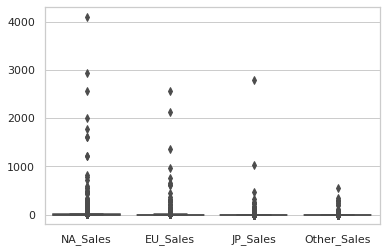

In [19]:
#이상치 boxplot으로 확인

boxplot_geo = df1.iloc[:, 5:9]
sns.set_theme(style="whitegrid")
sns.boxplot(data=boxplot_geo)
plt.show()

#plt로 subplot 그리기
# fig = plt.figure()
# ax1 = fig.add_subplot(1,2,1)
# ax2 = fig.add_subplot(1,2,2)

# sns.boxplot(data=df1['NA_Sales'], ax = ax1)
# sns.boxplot(data=df1['EU_Sales'], ax = ax2)

# sns.boxplot(data=df1['EU_Sales'])


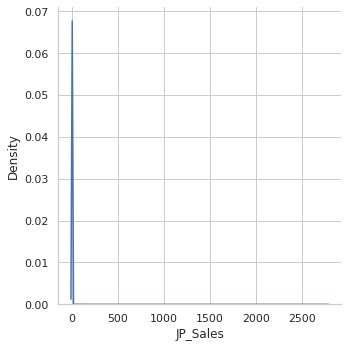

In [20]:
sns.displot(data=df1, x = 'JP_Sales', kind='kde')

In [21]:
#일본 이상치 확인

df1.sort_values(by='JP_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3589,Final Fantasy IX,PS,2000.0,Role-Playing,SquareSoft,1.62,0.77,2780.0,0.14,2782.53
9464,Densha De Go!,PS,1997.0,Simulation,Taito,0.00,0.00,1020.0,0.07,1020.07
6167,Resident Evil Director's Cut,PS,1996.0,Action,Virgin Interactive,1.82,1.24,470.0,0.25,473.31
6342,Kirby's Dream Collection: Special Edition,Wii,2012.0,Action,Nintendo,0.34,0.00,330.0,0.02,330.36
9995,Virtua Racing,GEN,1994.0,Racing,Sega,0.00,0.00,260.0,0.00,260.00
5671,Summon Night 3,PS2,2003.0,Role-Playing,Banpresto,0.00,0.00,240.0,0.00,240.00
2318,Castlevania: Symphony of the Night,PS,1997.0,Platform,Konami Digital Entertainment,0.58,0.40,210.0,0.08,211.06
5583,Digimon World 2,PS,2000.0,Role-Playing,Namco Bandai Games,0.23,0.16,160.0,40.00,200.39
12506,Kidou Senshi Gundam: Giren no Yabou - Axis no ...,PSP,2008.0,Strategy,Namco Bandai Games,0.00,0.00,160.0,0.00,160.00
2400,SimEarth: The Living Planet,SNES,1991.0,Simulation,Imagineer,0.00,0.00,160.0,0.00,160.00


In [80]:
#데이터 표준화

df4 = df1.iloc[:,5:9]

scaler = StandardScaler()
scaled_df1= scaler.fit_transform(df4)
scaled_df1

scaled_df2 = pd.DataFrame(scaled_df1, columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

# df5= pd.merge(df1.iloc[:,0:4], scaled_df2, left_index=True, right_index=True, how='left') 

scaled_df2['Name'] = df1['Name']
scaled_df2['Platform'] = df1['Platform']
scaled_df2['Year'] = df1['Year']
scaled_df2['Genre'] = df1['Genre']
scaled_df2['Publisher'] = df1['Publisher']

scaled_df2


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Name,Platform,Year,Genre,Publisher
0,-0.037988,-0.033685,-0.022645,-0.038341,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer
1,-0.035703,-0.033685,-0.022645,-0.036979,The Munchables,Wii,2009.0,Action,Namco Bandai Games
2,-0.038691,-0.033685,-0.021821,-0.038341,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist
3,-0.037988,-0.033685,-0.022645,-0.038341,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games
4,-0.036582,-0.030889,-0.022645,-0.032894,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher
...,...,...,...,...,...,...,...,...,...
16136,-0.036055,-0.032443,-0.022645,-0.036979,4 Elements,PC,2009.0,Puzzle,Mastertronic
16137,-0.038516,-0.033685,-0.022645,-0.038341,50 Cent: Bulletproof,PS2,2005.0,Action,Vivendi Games
16138,-0.030957,-0.027783,-0.021409,-0.020638,Shaun White Snowboarding: Road Trip,Wii,2008.0,Sports,Ubisoft
16139,-0.037813,-0.032132,-0.012344,-0.034256,Fantasia: Music Evolved,X360,2014.0,Misc,Disney Interactive Studios


In [27]:
#one-way anova test 미국
#(단위가 화폐별로 다를 수 있기 때문에, 데이터에 대한 설명 없어서 일원분산분석 실시)


model_NA = ols('NA_Sales ~ C(Genre)', df1).fit()
anova_lm(model_NA)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,2.478295e+04,2252.995022,0.70026,0.739621
Residual,16229.0,5.221471e+07,3217.370574,NaN,NaN


In [28]:
#one-way anova test EU

model_EU = ols('EU_Sales ~ C(Genre)', df1).fit()
anova_lm(model_EU)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,9.846301e+03,895.118284,0.869009,0.570442
Residual,16229.0,1.671659e+07,1030.044362,NaN,NaN


In [29]:
#one-way anova test JP
#일본만 그나마 p-value가 낮고, 나머지는 높아서 큰 차이가 없음.
#파이널판타지14의 극단치가 결정적으로 역할을 하는 것으로 보임.

model_JP = ols('JP_Sales ~ C(Genre)', df1).fit()
anova_lm(model_JP)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,1.009242e+04,917.492648,1.56788,0.10091
Residual,16229.0,9.496892e+06,585.180328,NaN,NaN


In [83]:
#표준화
#one-way anova test 일본
#(단위가 화폐별로 다를 수 있기 때문에, 데이터에 대한 설명 없어서 일원분산분석 실시)


model_NA = ols('JP_Sales ~ C(Genre)', scaled_df2).fit()
anova_lm(model_NA)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,4.315548,0.392323,0.381323,0.963855
Residual,15684.0,16136.435127,1.028847,NaN,NaN


In [30]:
#one-way anova test Others

model_Other = ols('Other_Sales ~ C(Genre)', df1).fit()
anova_lm(model_Other)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,304.185964,27.653269,0.51576,0.89421
Residual,16229.0,870142.524759,53.616521,NaN,NaN


In [31]:
#anova_lm말고 다른 검정 방법 사용

# f_group1 = df1[df1['Genre']=='Action']['NA_Sales']
# f_group2 = df1[df1['Genre']=='Adventure']['NA_Sales']
# f_group3 = df1[df1['Genre']=='Fighting']['NA_Sales']
# f_group4 = df1[df1['Genre']=='Puzzle']['NA_Sales']

# F_statistic, pVal = stats.f_oneway(f_group1, f_group2, f_group3, f_group4)

# F_statistic, pVal 

In [22]:
#지역에 따라서 선호하는 게임 장르

df1_geography = df1.groupby(['Genre']).mean()
df1_geography_mean = df1_geography.iloc[:,1:5]

df1_geography_mean2 = df1_geography_mean.copy()
df1_geography_mean2['Genre'] = df1_geography_mean.index

df1_geography_mean2_NA = df1_geography_mean2.sort_values(by='NA_Sales', ascending=False)
df1_geography_mean2_EU = df1_geography_mean2.sort_values(by='EU_Sales', ascending=False)
df1_geography_mean2_JP = df1_geography_mean2.sort_values(by='JP_Sales', ascending=False)
df1_geography_mean2_Other = df1_geography_mean2.sort_values(by='Other_Sales', ascending=False)



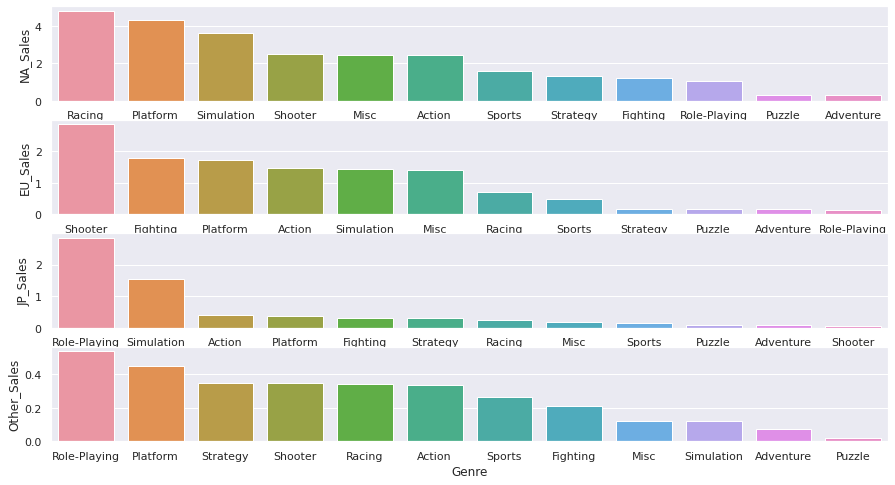

In [23]:
sns.set(rc = {'figure.figsize':(15,8)})
fig, axes = plt.subplots(4, 1)

sns.barplot(x='Genre', y='NA_Sales', data=df1_geography_mean2_NA, ax=axes[0])
sns.barplot(x='Genre', y='EU_Sales', data=df1_geography_mean2_EU, ax=axes[1])
sns.barplot(x='Genre', y='JP_Sales', data=df1_geography_mean2_JP, ax=axes[2])
sns.barplot(x='Genre', y='Other_Sales', data=df1_geography_mean2_Other, ax=axes[3])

### **3 연도별 게임의 트렌드가 있을까**

- 5개년 단위로 끊어서 그룹화
- 5개년도 장르별 매출 평균 lineplot으로 시각화
- 2 sample t-test 수행
- pairwise t-test 불가능한 이유
- shapiro test로 정규성 검정


In [32]:
#5개년 별 데이터 
#year 1000 이하 데이터 행 삭제
df1 = df1.drop(df1[(df1['Year'] < 1000)].index)
df1['Year'].value_counts().head(40)


2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
2006.0     998
2005.0     930
2002.0     823
2003.0     767
2004.0     736
2012.0     650
2015.0     606
2014.0     578
2013.0     543
2001.0     478
1998.0     374
2000.0     345
2016.0     337
1999.0     336
1997.0     287
1996.0     259
1995.0     215
1994.0     120
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      20
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [33]:
#5개년 단위로 끊어서 group 만들기

Conditions=[
(df1['Year'] >=1976) & (df1['Year'] <=1980),
(df1['Year'] >=1981) & (df1['Year'] <=1985),
(df1['Year'] >=1986) & (df1['Year'] <=1990),
(df1['Year'] >=1991) & (df1['Year'] <=1995),
(df1['Year'] >=1996) & (df1['Year'] <=2000),
(df1['Year'] >=2001) & (df1['Year'] <=2005),
(df1['Year'] >=2006) & (df1['Year'] <=2010),
(df1['Year'] >=2011) & (df1['Year'] <=2015),
(df1['Year'] >=2016) & (df1['Year'] <=2020)]

condition_values = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]

df1['Groupby_year'] = np.select(Conditions, condition_values)

df1.head(10)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Groupby_year
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04,2010
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,2010
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,2010
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,2010
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,2010
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14,2005
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03,2015
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19,2005
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00,0.04,2010
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01,0.08,2015


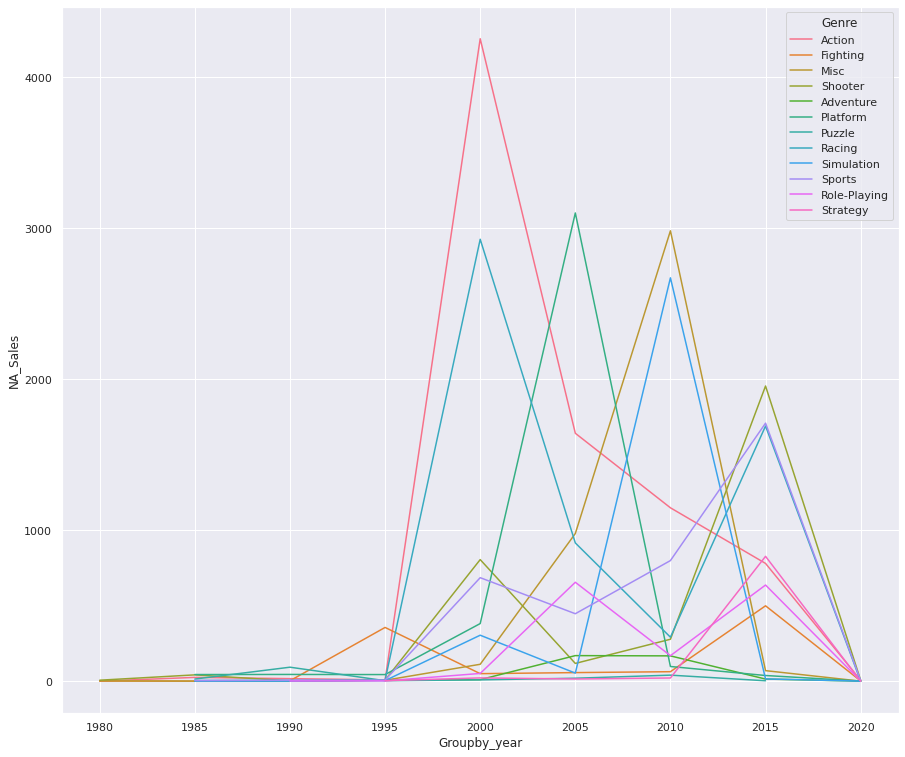

In [34]:
#미국 5개년도 단위 장르별 매출액 평균

df3 = df1.groupby(['Groupby_year','Genre']).agg({'NA_Sales':'sum'})
df3 = df3.reset_index()
plt.figure(figsize=(15,13))

sns.lineplot(x='Groupby_year', y='NA_Sales', hue='Genre', data=df3) 


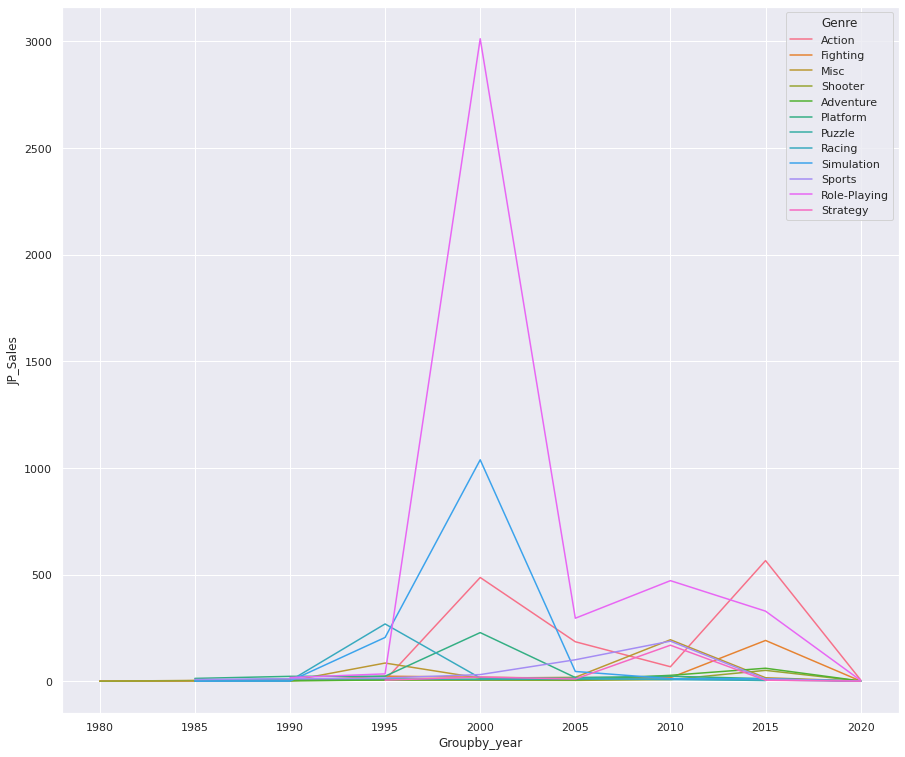

In [35]:
#일본 5개년도 단위 장르별 매출액 평균

df3 = df1.groupby(['Groupby_year','Genre']).agg({'JP_Sales':'sum'})
df3 = df3.reset_index()
plt.figure(figsize=(15,13))

sns.lineplot(x='Groupby_year', y='JP_Sales', hue='Genre', data=df3) 

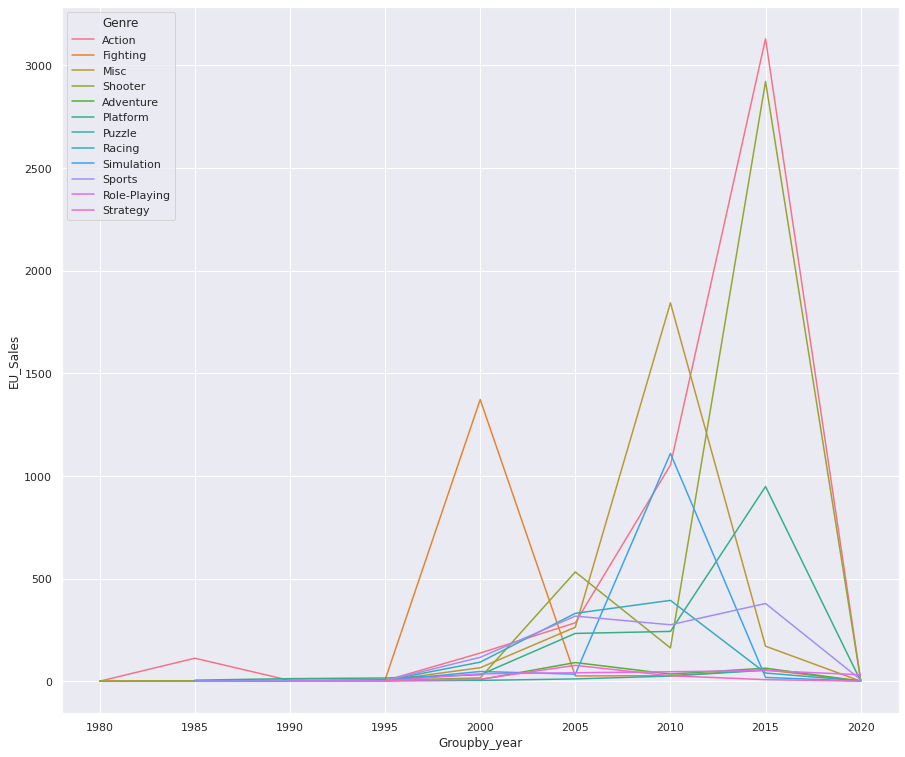

In [36]:
#유럽 5개년도 단위 장르별 매출액 평균

df3 = df1.groupby(['Groupby_year','Genre']).agg({'EU_Sales':'sum'})
df3 = df3.reset_index()
plt.figure(figsize=(15,13))

sns.lineplot(x='Groupby_year', y='EU_Sales', hue='Genre', data=df3) 

In [87]:
#2 samples t-test (두 집단간 검정)

ttest1= df1[(df1['Genre']=='Role-Playing') & (df1['Groupby_year']==2000)]['JP_Sales']
ttest2= df1[(df1['Genre']=='Action') & (df1['Groupby_year']==2005)]['JP_Sales']

#등분산 아님 Welch t test
stats.ttest_ind(ttest1, ttest2, equal_var=False)


Ttest_indResult(statistic=1.0683610429429826, pvalue=0.2872362077613213)

In [86]:
#pair-wise t-test
#수가 달라서 판단할 수가 없다
#이게 몇년도에 얼만큼 수익을 기록했는지 기록되어 있지 않은 1차원 데이터라서 시점별 검정 불가


# ttest3= df1[(df1['Genre']=='Role-Playing') & (df1['Groupby_year']==2000)]['JP_Sales']
# ttest4= df1[(df1['Genre']=='Role-Playing') & (df1['Groupby_year']==2005)]['JP_Sales']

# stats.ttest_rel(ttest3, ttest4)

In [88]:
#정규성 검정 shapiro test

stats.shapiro(ttest1), stats.shapiro(ttest2)

((0.06572341918945312, 9.82919640199491e-26), (0.030212998390197754, 0.0))

### **4 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

- Top 10 게임의 국가별 매출 점유율 piechart 도출
- Top 10 게임 콘솔별 국가 단위 매출 barplot 도출
- Top 10 게임 회사별 국가 단위 매출 barplot 도출

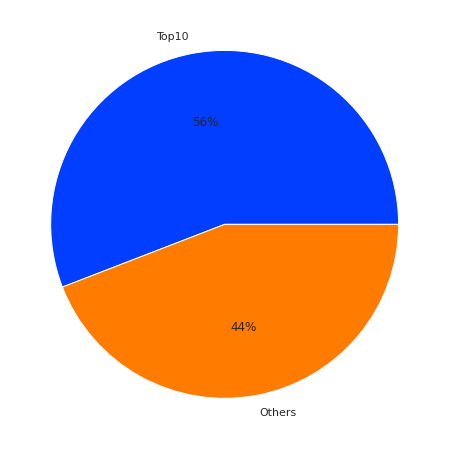

In [45]:
df1_NA_sorted['NA_Sales'].sum() / df1['NA_Sales'].sum()

data_NA_top10 = [df1_NA_sorted['NA_Sales'].sum() / df1['NA_Sales'].sum(), 1-df1_NA_sorted['NA_Sales'].sum() / df1['NA_Sales'].sum()]
labels_NA_top10 = ['Top10', 'Others']
colors_NA_top10 = sns.color_palette('bright')

plt.pie(data_NA_top10, labels=labels_NA_top10, colors = colors_NA_top10, autopct = '%0.0f%%')
plt.show()

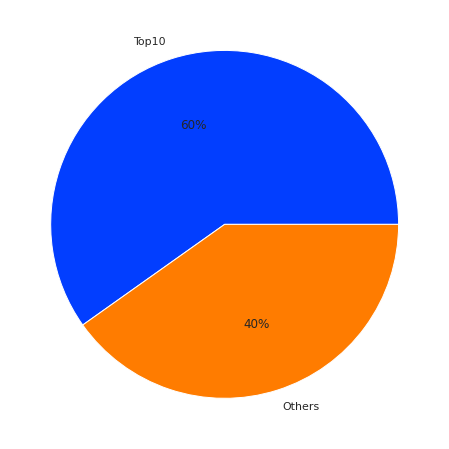

In [46]:
df1_EU_sorted['EU_Sales'].sum() / df1['EU_Sales'].sum()

data_EU_top10 = [df1_EU_sorted['EU_Sales'].sum() / df1['EU_Sales'].sum(), 1-df1_EU_sorted['EU_Sales'].sum() / df1['EU_Sales'].sum()]
labels_EU_top10 = ['Top10', 'Others']
colors_EU_top10 = sns.color_palette('bright')

plt.pie(data_EU_top10, labels=labels_EU_top10, colors = colors_EU_top10, autopct = '%0.0f%%')
plt.show()

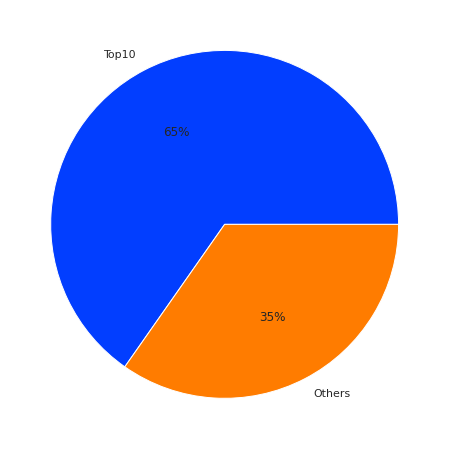

In [47]:
df1_JP_sorted['JP_Sales'].sum() / df1['JP_Sales'].sum()

data_JP_top10 = [df1_JP_sorted['JP_Sales'].sum() / df1['JP_Sales'].sum(), 1-df1_JP_sorted['JP_Sales'].sum() / df1['JP_Sales'].sum()]
labels_JP_top10 = ['Top10', 'Others']
colors_JP_top10 = sns.color_palette('bright')

plt.pie(data_JP_top10, labels=labels_JP_top10, colors = colors_JP_top10, autopct = '%0.0f%%')
plt.show()

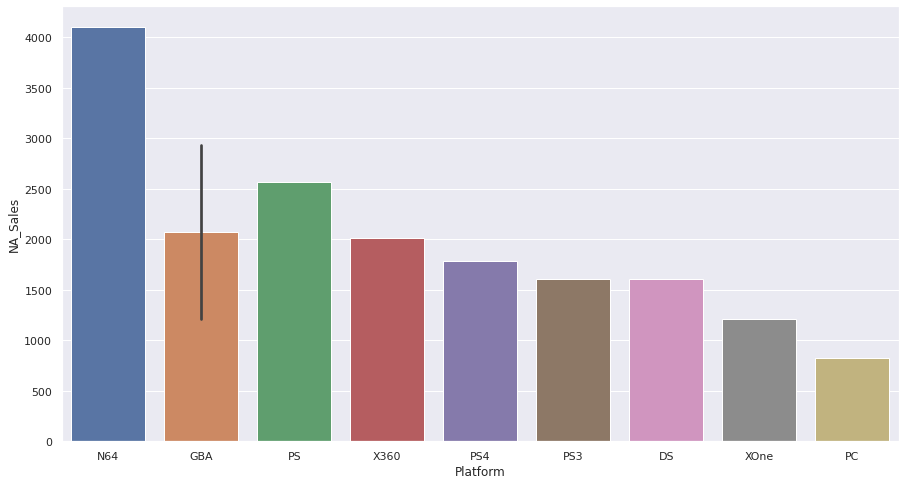

In [39]:
#게임 콘솔 종류 별

df1_NA_sorted = df1.sort_values(by='NA_Sales', ascending=False).head(10)
df1_EU_sorted = df1.sort_values(by='EU_Sales', ascending=False).head(10)
df1_JP_sorted = df1.sort_values(by='JP_Sales', ascending=False).head(10)

sns.barplot(x='Platform', y='NA_Sales', data=df1_NA_sorted)

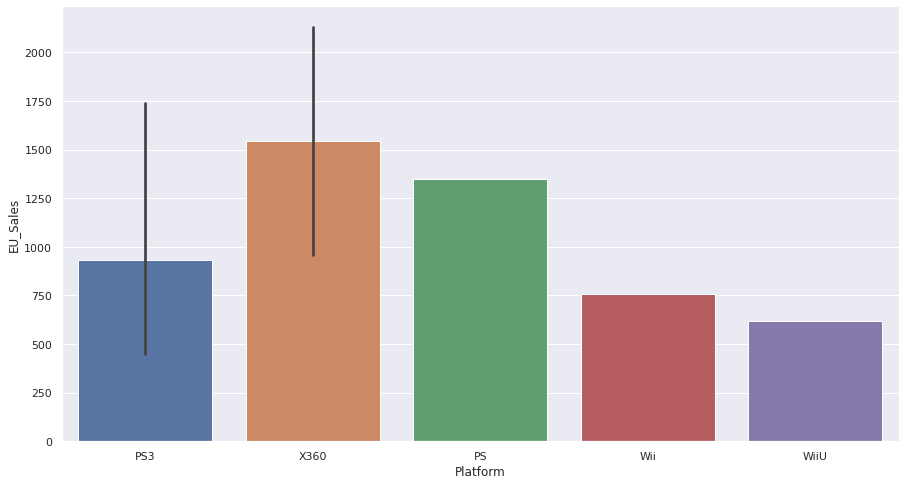

In [40]:
sns.barplot(x='Platform', y='EU_Sales', data=df1_EU_sorted)

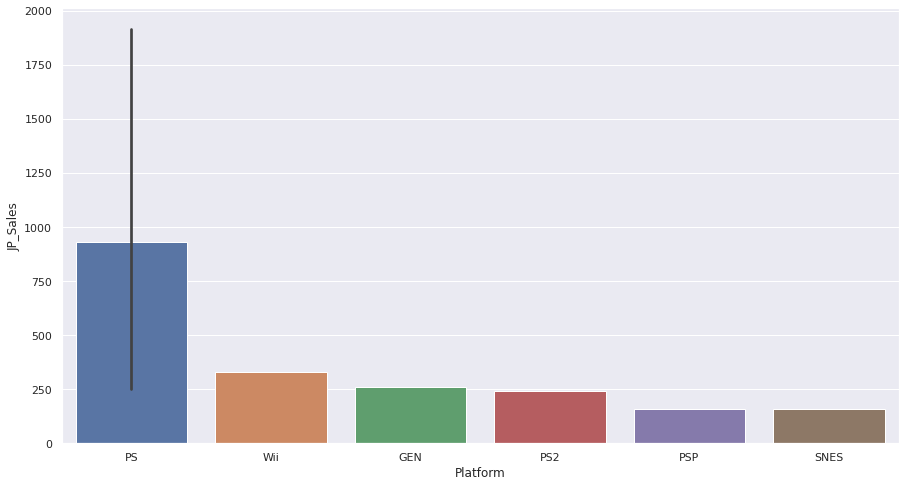

In [41]:
sns.barplot(x='Platform', y='JP_Sales', data=df1_JP_sorted)

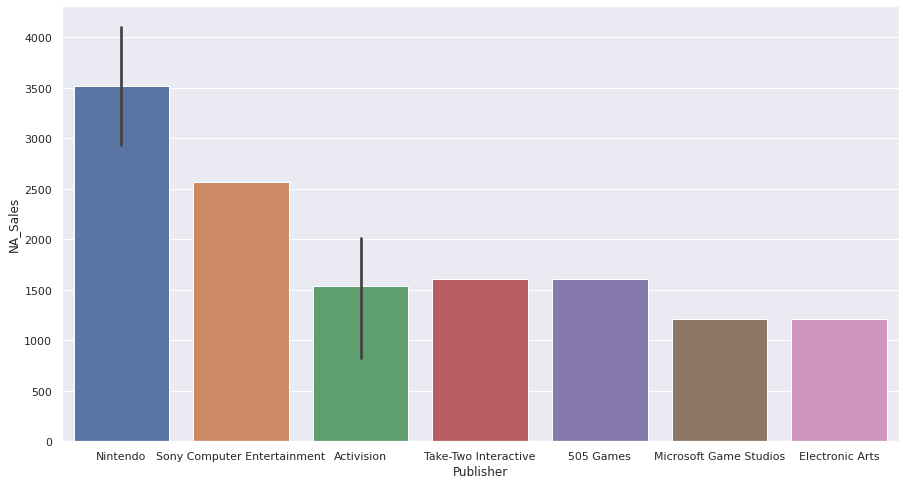

In [42]:
#게임 회사별


sns.barplot(x='Publisher', y='NA_Sales', data=df1_NA_sorted)

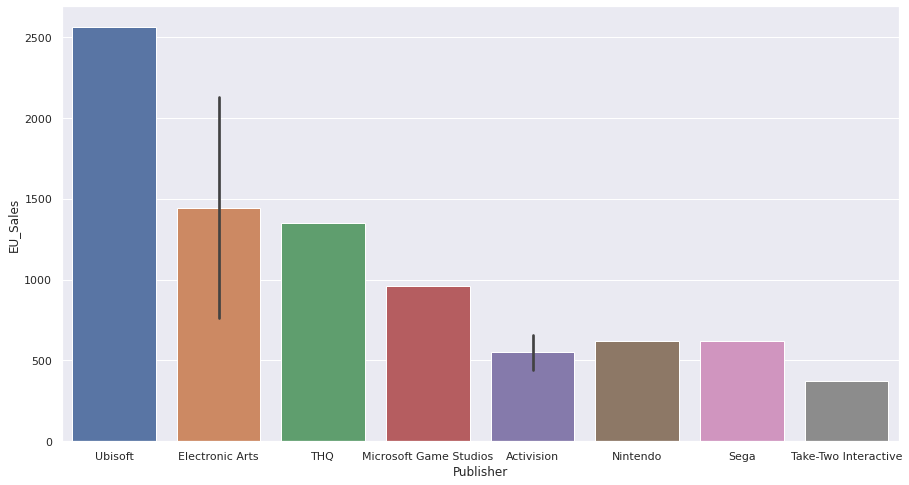

In [43]:
sns.barplot(x='Publisher', y='EU_Sales', data=df1_EU_sorted)

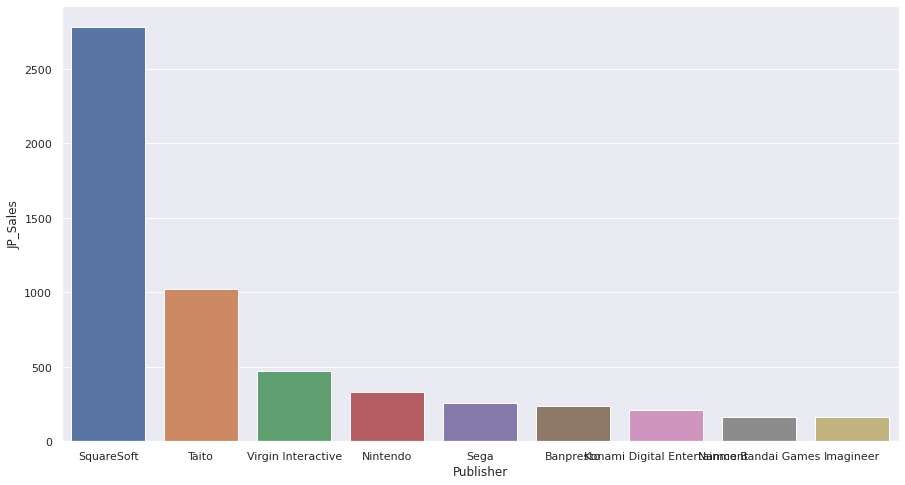

In [44]:
sns.barplot(x='Publisher', y='JP_Sales', data=df1_JP_sorted)